In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import corner
import asteroseismology as se
rootpath = '/Volumes/Data/Onedrive/Work/numax-sc-metallicity/'
work_dir = rootpath+'surface/'
data_dir = rootpath+'hpc/'
import scipy
import h5py
import glob
from astropy.io import ascii
from astropy.table import Table

# model S

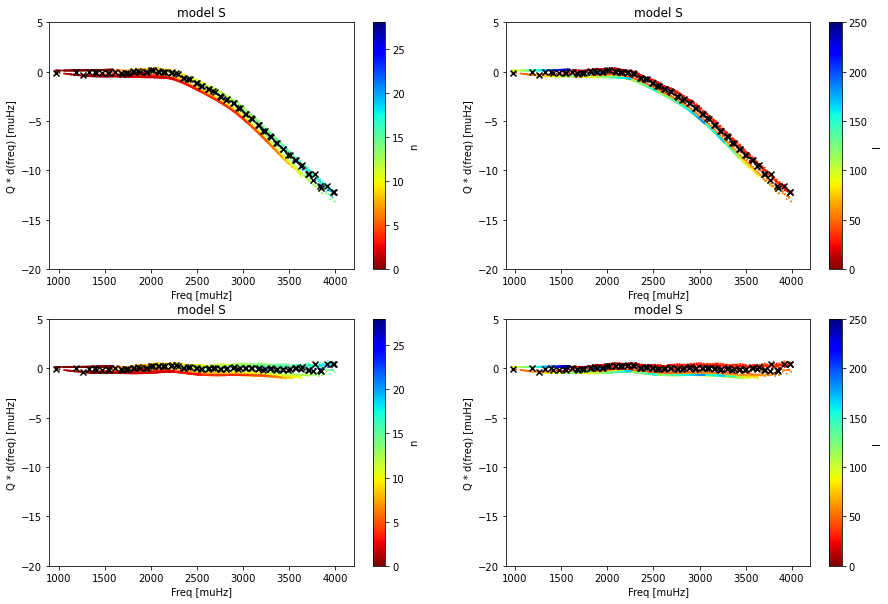

In [17]:
# read in observational freqs
obs = pd.read_excel(rootpath+'solar_freq.xlsx')

# read in model S freqs
modS = pd.read_fwf(rootpath+'model_S.dat',skiprows=1,infer_nrows =3800)

l0 = modS['l']==0
fi = scipy.interpolate.interp1d(np.array(modS.loc[l0,'freq']), 
      np.array(modS.loc[l0,'E_norm']), kind='cubic', fill_value='extrapolate')

# merge
modS = pd.merge(obs, modS, on=['l', 'n'], suffixes=('_obs', '_mod'))
for imode, mode in modS.iterrows():
    modS.loc[imode, 'Q'] = mode['E_norm']/fi(mode['freq_mod'])
    
# surf corr
modS['freq_mod_cor'] = se.get_surface_correction(np.array(modS['freq_obs']), np.array(modS['l']), 
                                                  np.array(modS['freq_mod']), np.array(modS['l']), 
                                                  np.array(modS['E_norm']), 3100., formula='combined')

fig, axes = plt.subplots(figsize=[15,10],nrows=2,ncols=2,squeeze=False)
axes = axes.reshape(-1)

idx = modS['l']<=3
axes[0].scatter(modS.loc[idx,'freq_obs'], (modS.loc[idx,'freq_obs']-modS.loc[idx,'freq_mod'])*modS.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[0].scatter(modS['freq_obs'], (modS['freq_obs']-modS['freq_mod'])*modS['Q'], c=modS['n'], cmap='jet_r', s=1)
plt.colorbar(c,ax=axes[0]).set_label('n')

axes[1].scatter(modS.loc[idx,'freq_obs'], (modS.loc[idx,'freq_obs']-modS.loc[idx,'freq_mod'])*modS.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[1].scatter(modS['freq_obs'], (modS['freq_obs']-modS['freq_mod'])*modS['Q'], c=modS['l'], cmap='jet_r', s=1)
plt.colorbar(c,ax=axes[1]).set_label('l')

axes[2].scatter(modS.loc[idx,'freq_obs'], (modS.loc[idx,'freq_obs']-modS.loc[idx,'freq_mod_cor'])*modS.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[2].scatter(modS['freq_obs'], (modS['freq_obs']-modS['freq_mod_cor'])*modS['Q'], c=modS['n'], cmap='jet_r', s=1)
plt.colorbar(c,ax=axes[2]).set_label('n')

axes[3].scatter(modS.loc[idx,'freq_obs'], (modS.loc[idx,'freq_obs']-modS.loc[idx,'freq_mod_cor'])*modS.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[3].scatter(modS['freq_obs'], (modS['freq_obs']-modS['freq_mod_cor'])*modS['Q'], c=modS['l'], cmap='jet_r', s=1)
plt.colorbar(c,ax=axes[3]).set_label('l')

for iax in range(4):
    axes[iax].axis([900,4200,-20,5.])
    axes[iax].set_title('model S')
    axes[iax].set_xlabel('Freq [muHz]')
    axes[iax].set_ylabel('Q * d(freq) [muHz]')


Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98_ov/outputs/sample0118.sum


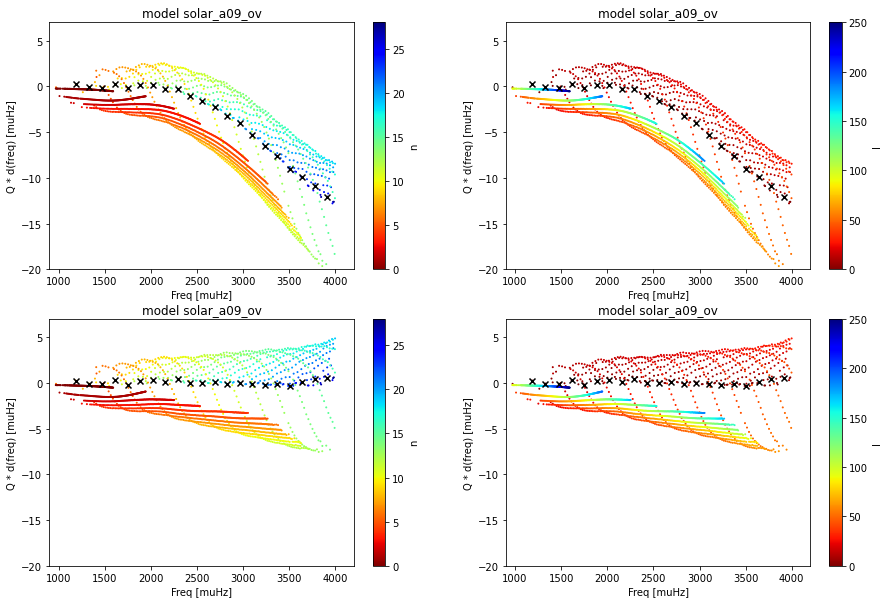

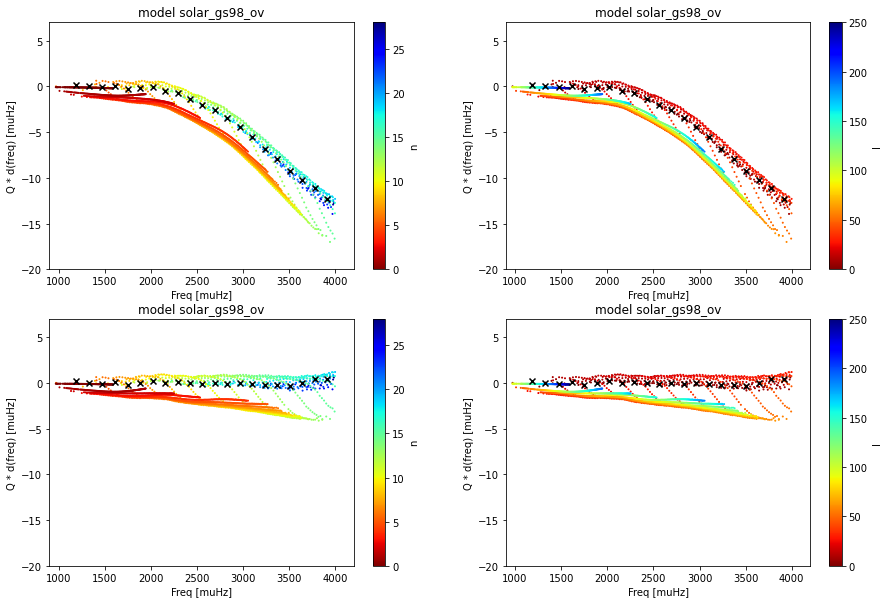

In [30]:
# cases = ['solar_a09', 'solar_a09_ov', 'solar_gs98', 'solar_gs98_ov']
# samples = ['0118', '0060', '0026', '0118']

cases = ['solar_a09_ov', 'solar_gs98_ov']
samples = ['0060', '0118']
models = []
# read in best model freqs
for icase in range(0,2):
    # read in observational freqs
    obs = pd.read_excel(rootpath+'solar_freq.xlsx')

    s = se.sums(data_dir+cases[icase]+'/outputs/sample'+samples[icase]+'.sum').sums
    
    cols = ['l','n_p','Refreq','E_norm']
    data = np.array([s[col][irow] for col in cols for irow in range(s.shape[0])]).reshape(-1,s.shape[0]).T
    mod = pd.DataFrame(data, columns=['l','n','freq','E_norm'])
    idx = mod['l']==1
    mod.loc[idx,'n'] += 1

    l0 = mod['l']==0
    fi = scipy.interpolate.interp1d(np.array(mod.loc[l0,'freq']), 
          np.array(mod.loc[l0,'E_norm']), kind='cubic', fill_value='extrapolate')

    # merge
    mod = pd.merge(obs, mod, on=['l', 'n'], suffixes=('_obs', '_mod'))
    for imode, mode in mod.iterrows():
        mod.loc[imode, 'Q'] = mode['E_norm']/fi(mode['freq_mod'])
    
    # surf corr
    mod['freq_mod_cor'] = se.get_surface_correction(np.array(mod['freq_obs']), np.array(mod['l']), 
                                                      np.array(mod['freq_mod']), np.array(mod['l']), 
                                                      np.array(mod['E_norm']), 3100., formula='combined')

    fig, axes = plt.subplots(figsize=[15,10],nrows=2,ncols=2,squeeze=False)
    axes = axes.reshape(-1)

    idx = mod['l']==1
    axes[0].scatter(mod.loc[idx,'freq_obs'], (mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
    c=axes[0].scatter(mod['freq_obs'], (mod['freq_obs']-mod['freq_mod'])*mod['Q'], c=mod['n'], cmap='jet_r', s=1)
    plt.colorbar(c,ax=axes[0]).set_label('n')

    axes[1].scatter(mod.loc[idx,'freq_obs'], (mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
    c=axes[1].scatter(mod['freq_obs'], (mod['freq_obs']-mod['freq_mod'])*mod['Q'], c=mod['l'], cmap='jet_r', s=1)
    plt.colorbar(c,ax=axes[1]).set_label('l')

    axes[2].scatter(mod.loc[idx,'freq_obs'], (mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod_cor'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
    c=axes[2].scatter(mod['freq_obs'], (mod['freq_obs']-mod['freq_mod_cor'])*mod['Q'], c=mod['n'], cmap='jet_r', s=1)
    plt.colorbar(c,ax=axes[2]).set_label('n')

    axes[3].scatter(mod.loc[idx,'freq_obs'], (mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod_cor'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
    c=axes[3].scatter(mod['freq_obs'], (mod['freq_obs']-mod['freq_mod_cor'])*mod['Q'], c=mod['l'], cmap='jet_r', s=1)
    plt.colorbar(c,ax=axes[3]).set_label('l')

    models.append(mod)
    
    for iax in range(4):
        axes[iax].axis([900,4200,-20,7.])
        axes[iax].set_title('model {:s}'.format(cases[icase]))
        axes[iax].set_xlabel('Freq [muHz]')
        axes[iax].set_ylabel('Q * d(freq) [muHz]')


#     ls = np.arange(0,251)
#     chi2s = np.zeros(251)

#     for il, l in enumerate(ls):
#         idx = (modS['l']==l)
#         chi2s[il] = np.nanmean((mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod'])**2.0/mod.loc[idx,'e_freq']**2.0)

#     plt.figure()
#     plt.plot(ls, chi2s, 'k.')
#     plt.xlabel('l')
#     plt.ylabel('chi2')
#     plt.axis([-5,255,10.0**3, 2*10.0**6])
#     plt.yscale('log')
#     plt.title(cases[icase])

# Chi2

(-1.0, 15.0, 10.0, 2000000.0)

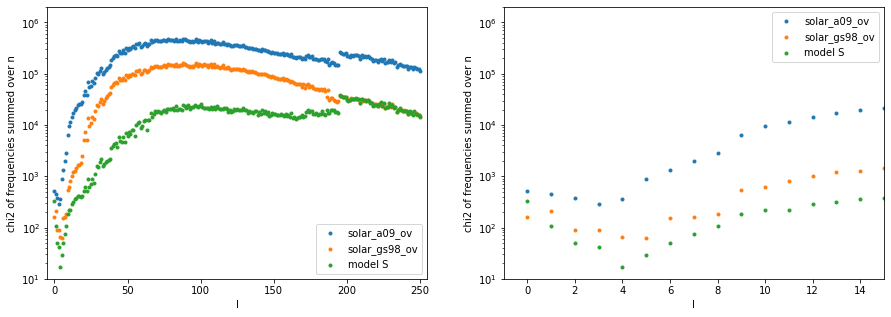

In [49]:
mod1, mod2 = models

fig, axes = plt.subplots(figsize=[15,5],nrows=1,ncols=2,squeeze=False)
axes = axes.reshape(-1)

model_names = ['solar_a09_ov', 'solar_gs98_ov', 'model S']
for imod, mod in enumerate([mod1, mod2, modS]):
    ls = np.arange(0,251)
    chi2s = np.zeros(251)

    for il, l in enumerate(ls):
        idx = (mod['l']==l)
        chi2s[il] = np.nanmean((mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod_cor'])**2.0/mod.loc[idx,'e_freq']**2.0)


    axes[0].scatter(ls, chi2s, marker='.', label=model_names[imod])
    axes[1].scatter(ls, chi2s, marker='.', label=model_names[imod])
    
for iax in range(2):
    axes[iax].set_xlabel('l')
    axes[iax].legend()
    axes[iax].set_ylabel('chi2 of frequencies summed over n')
    axes[iax].set_yscale('log')
# axes[0].set_xscale('log')

axes[0].axis([-5,255,10.0**1, 2*10.0**6])
axes[1].axis([-1,15,10.0**1, 2*10.0**6])

# Glitches

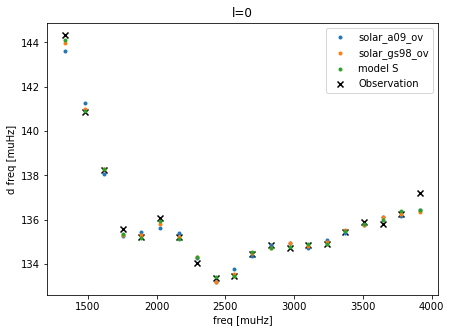

In [47]:
# Glitches

mod1, mod2 = models

fig, axes = plt.subplots(figsize=[7,5],nrows=1,ncols=1,squeeze=False)
axes = axes.reshape(-1)

model_names = ['solar_a09_ov', 'solar_gs98_ov', 'model S']
for imod, mod in enumerate([mod1, mod2, modS]):
    
    idx = (mod['l']==0) & (mod['freq_obs']>1000)
    freq = np.array(mod.loc[idx, 'freq_mod_cor'])
    x = (freq[0:-1]+freq[1:])/2.
    y = (freq[1:]-freq[0:-1])
    axes[0].scatter(x, y, marker='.', label=model_names[imod])

idx = (mod['l']==0) & (mod['freq_obs']>1000)
freq = np.array(mod.loc[idx, 'freq_obs'])
x = (freq[0:-1]+freq[1:])/2.
y = (freq[1:]-freq[0:-1])
axes[0].scatter(x, y, marker='x', color='k', label='Observation', zorder=-100)

for iax in range(1):
    axes[iax].set_xlabel('freq [muHz]')
    axes[iax].legend()
    axes[iax].set_ylabel('d freq [muHz]')
    axes[iax].set_title('l=0')
# axes[iax].set_yscale('log')
# axes[0].set_xscale('log')

# axes[0].axis([-5,255,10.0**1, 2*10.0**6])
# axes[1].axis([-5,10,10.0**1, 2*10.0**6])